In [11]:
# Importuri
import math
import numpy as np
import matplotlib.pylab as plt

# Defs
PI = math.pi
E = math.e

[[ 1.00000000e+00+0.00000000e+00j  1.00000000e+00+0.00000000e+00j
   1.00000000e+00+0.00000000e+00j  1.00000000e+00+0.00000000e+00j
   1.00000000e+00+0.00000000e+00j  1.00000000e+00+0.00000000e+00j
   1.00000000e+00+0.00000000e+00j  1.00000000e+00+0.00000000e+00j]
 [ 1.00000000e+00+0.00000000e+00j  7.07106781e-01-7.07106781e-01j
   6.12323400e-17-1.00000000e+00j -7.07106781e-01-7.07106781e-01j
  -1.00000000e+00-1.22464680e-16j -7.07106781e-01+7.07106781e-01j
  -1.83697020e-16+1.00000000e+00j  7.07106781e-01+7.07106781e-01j]
 [ 1.00000000e+00+0.00000000e+00j  6.12323400e-17-1.00000000e+00j
  -1.00000000e+00-1.22464680e-16j -1.83697020e-16+1.00000000e+00j
   1.00000000e+00+2.44929360e-16j  3.06161700e-16-1.00000000e+00j
  -1.00000000e+00-3.67394040e-16j -4.28626380e-16+1.00000000e+00j]
 [ 1.00000000e+00+0.00000000e+00j -7.07106781e-01-7.07106781e-01j
  -1.83697020e-16+1.00000000e+00j  7.07106781e-01-7.07106781e-01j
  -1.00000000e+00-3.67394040e-16j  7.07106781e-01+7.07106781e-01j
   5.51

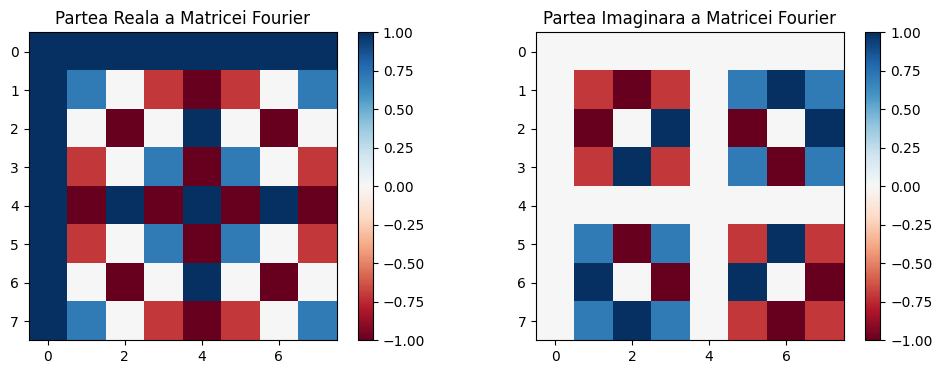

In [12]:
# 1
N = 8

def calculate_component(N):
    matrix = np.zeros((N, N), dtype=np.complex128)
    for w in range(0, N):
        for n in range(0, N):
            matrix[w, n] = E ** (-2j * PI * n * w / N)
        
    return matrix

matrix = calculate_component(N)
print(matrix)

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.imshow(np.real(matrix), cmap='RdBu', aspect='equal', interpolation='none')
plt.colorbar()
plt.title('Partea Reala a Matricei Fourier')

# Desenarea părții imaginară a matricei Fourier
plt.subplot(122)
plt.imshow(np.imag(matrix), cmap='RdBu', aspect='equal', interpolation='none')
plt.colorbar()
plt.title('Partea Imaginara a Matricei Fourier')

plt.show()

Matricea este unitara: False


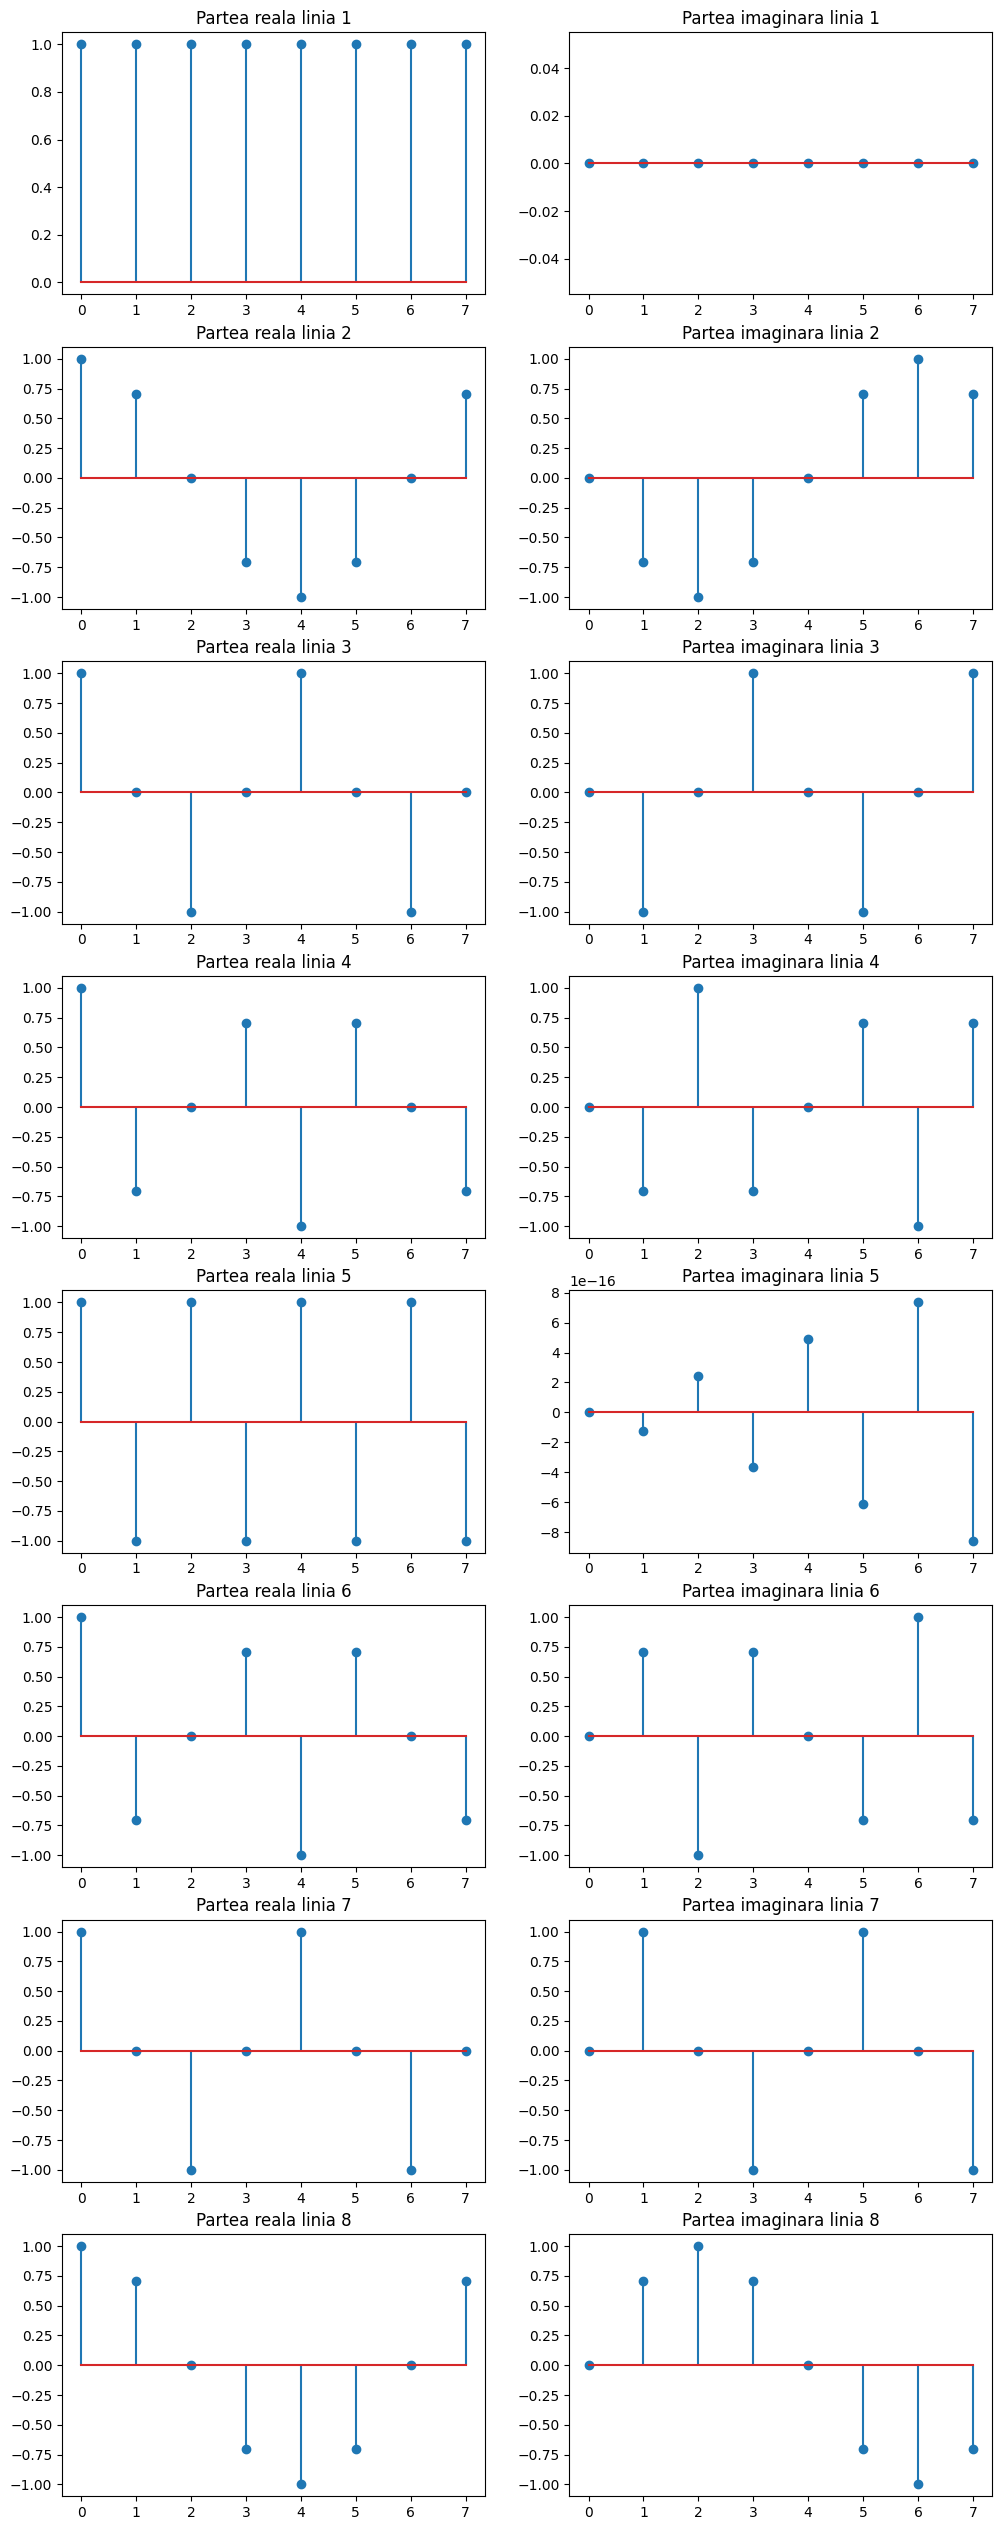

In [13]:
fig, axs = plt.subplots(8, 2, figsize=(12, 4*8))

for i in range(8):
    axs[i, 0].stem(range(8), matrix[i, :].real)
    axs[i, 0].set_title(f"Partea reala linia {i+1}")
    axs[i, 1].stem(range(8), matrix[i, :].imag)
    axs[i, 1].set_title(f"Partea imaginara linia {i+1}")
    
conjugate = matrix.conj()
matrix_transpose = conjugate.T

is_unitary = np.allclose(np.dot(matrix_transpose, matrix), np.eye(N), rtol=1e-6)

print("Matricea este unitara:", is_unitary)

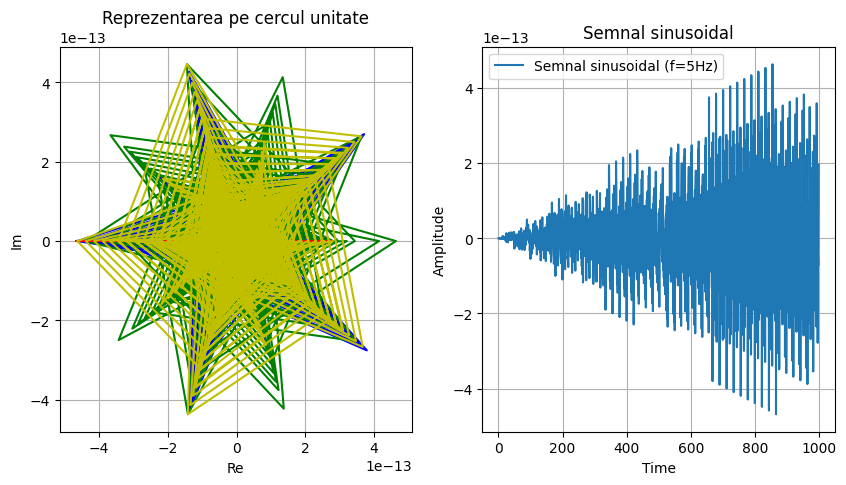

In [14]:
# Ex2
f = 5  # Frecvența semnalului sinusoidal
fs = 10  # Frecvența de esantionare
n_samples = 1000  # Numarul de esantioane
n = np.arange(n_samples)
x = np.sin(2 * PI * f * n / fs)

# Definesc semnalul sinusoidal
# Calcularea z[w] pentru w in {1Hz, 2Hz, 5Hz, 7Hz}
omega_values = [1, 2, 5, 7]
colors = ['b', 'g', 'r', 'y']

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for i, omega in enumerate(omega_values):
    z = x * np.exp(-2 * PI * 1j * omega * n / fs)
    axs[0].plot(np.real(z), np.imag(z), color=colors[i], label=f'ω={omega}Hz')
    axs[0].set_xlabel('Re')
    axs[0].set_ylabel('Im')
    axs[0].set_title('Reprezentarea pe cercul unitate')
    axs[0].grid(True)

# Reprezentarea semnalului sinusoidal
axs[1].plot(n, x, label=f'Semnal sinusoidal (f={f}Hz)')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Amplitude')
axs[1].set_title('Semnal sinusoidal')
axs[1].grid(True)

plt.legend()
plt.show()


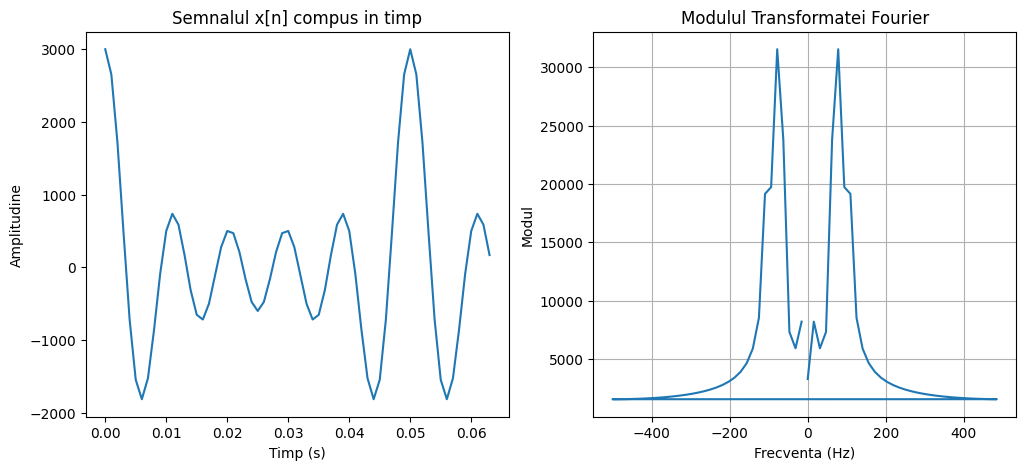

In [15]:
# Ex3
N = 64  # Numarul de esantioane pentru transformata Fourier
fs = 1000  # Frecventa de eșantionare (Hz)
t = np.linspace(0, N / fs, N, endpoint=False)  # Timpul pentru N esantioane

frequencies = [0, 20, 40, 60, 80, 100]  # Frecventele semnalului
amplitudes = [0, 200, 400, 600, 800, 1000, 1200]  # Amplitudinile semnalului
x = np.zeros(N, dtype=np.complex128)

for i in range(len(frequencies)):
    x += amplitudes[i] * np.cos(2 * PI * frequencies[i] * t)
    
def calculate_component(N):
    matrix = np.zeros((N, N), dtype=np.complex128)
    for w in range(N):
        for n in range(N):
            matrix[w, n] = np.exp(-2j * PI * n * w / N)
    return matrix

matrix = calculate_component(N)

X = np.dot(matrix, x)

# Calculul modulului transformatei Fourier
X_magnitude = np.abs(X)

# Afișați modulul transformatei Fourier
frequencies = np.fft.fftfreq(N, 1 / fs)  # Frecventele corespunzatoare coeficienților Fourier

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(t, np.real(x))
plt.title('Semnalul x[n] compus in timp')
plt.xlabel('Timp (s)')
plt.ylabel('Amplitudine')

plt.subplot(1, 2, 2)
plt.plot(frequencies, X_magnitude)
plt.title('Modulul Transformatei Fourier')
plt.xlabel('Frecventa (Hz)')
plt.ylabel('Modul')
plt.grid()

plt.show()
